## **Latar Belakang**


 Dataset CSV ini berisi data statistik pelanggan supermarket yang meliputi profil demografi, perilaku belanja, pengeluaran produk, respons promosi, dan preferensi pembelian, yang berguna untuk analisis pemasaran dan operasional bisnis ritel.

## **Rumusan Masalah**

Bagaimana karakteristik demografi pelanggan seperti usia, pendidikan, status pernikahan, pendapatan, dan jumlah anak/remaja di rumah tangga mempengaruhi perilaku belanja mereka di supermarket, terutama dalam hal pengeluaran untuk berbagai kategori produk?

## **Importing Library**

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
df=pd.read_csv('Supermarket Customers.csv', sep='\t')

### **Untuk Mengetahu Informasi Dari Dataset**

In [180]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [181]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### Kode Python yang Anda berikan memiliki fungsi untuk menampilkan jumlah dan nilai unik dari setiap kolom dalam sebuah DataFrame pandas.

1. pd.set_option('display.max_colwidth', None) digunakan untuk menghilangkan batasan lebar kolom saat menampilkan DataFrame di Jupyter Notebook atau lingkungan Python lainnya. Hal ini memungkinkan nilai-nilai dalam kolom ditampilkan secara utuh tanpa pemotongan (truncating). 
2. listItem = [] membuat sebuah list kosong yang akan digunakan untuk menyimpan data yang akan dimasukkan ke dalam DataFrame baru.
for col in df.columns: melakukan iterasi melalui setiap kolom dalam DataFrame df.
listItem.append([col, df[col].nunique(), df[col].unique()]) menambahkan daftar yang berisi nama kolom (col), jumlah nilai unik dalam kolom tersebut (df[col].nunique()), dan daftar nilai unik dalam kolom tersebut (df[col].unique()). Daftar ini ditambahkan ke dalam listItem.
3. tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem) membuat DataFrame baru bernama tabel1Desc dengan kolom 'Column Name', 'Number of Unique', dan 'Unique Sample'. Data untuk DataFrame ini diambil dari listItem yang telah diisi pada langkah sebelumnya.
tabel1Desc akan menampilkan DataFrame tabel1Desc yang berisi informasi tentang nama kolom, jumlah nilai unik, dan contoh nilai unik untuk setiap kolom dalam DataFrame asli (df).

In [182]:
pd.set_option('display.max_colwidth', None)   # remove limitation on column width
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

### **Persentase Missing Value Di Tiap Kolom**


In [183]:
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

### **Check for null values in the Income column**

In [184]:
income_nulls = df['Income'].isnull().sum()
print(f"Number of null values in Income column: {income_nulls}")

Number of null values in Income column: 24


### **Menghapus Baris Data Yang Memiliki Nilai Yang Hilang (NaN/None/Null/Missing Value) Pada Kolom 'Income' Dari DataFrame df.**

1. df.dropna() adalah metode dalam library Pandas yang digunakan untuk menghapus baris atau kolom yang mengandung nilai NaN (Not a Number) atau nilai yang hilang.
subset=['Income'] adalah parameter yang menentukan kolom mana yang akan diperiksa keberadaan nilai NaN. Dalam kasus ini, hanya kolom 'Income' yang akan diperiksa.
2. Dengan menggabungkan df.dropna(subset=['Income']), metode ini akan menghapus semua baris data dalam DataFrame df yang memiliki nilai NaN atau nilai yang hilang pada kolom 'Income'.
3. Hasil dari operasi penghapusan baris tersebut kemudian ditetapkan kembali ke variabel df, sehingga df akan berisi DataFrame yang telah diperbarui dengan menghapus baris yang memiliki nilai NaN pada kolom 'Income'.

In [185]:
df = df.dropna(subset=['Income'])

### **Fill Null Values In Income Column With Median**

1. income_median = df['Income'].median()
Menghitung nilai median dari kolom 'Income' dalam DataFrame df.
Nilai median ini kemudian disimpan dalam variabel income_median.
2. df['Income'] = df['Income'].fillna(income_median)
df['Income'].fillna(income_median) adalah metode dalam Pandas yang digunakan untuk mengisi nilai yang hilang (NaN) pada kolom 'Income' dengan nilai income_median.
Hasil dari operasi pengisian nilai ini kemudian ditetapkan kembali ke kolom 'Income' dalam DataFrame df, sehingga nilai yang hilang pada kolom 'Income' telah diisi dengan nilai median.

In [186]:
income_median = df['Income'].median()
df['Income'] = df['Income'].fillna(income_median)

### **Fill null values in Income column with 0**

1. df['Income'].fillna(0) adalah metode dalam Pandas yang digunakan untuk mengisi nilai yang hilang (NaN) pada kolom 'Income' dengan nilai 0.
2. Hasil dari operasi pengisian nilai ini kemudian ditetapkan kembali ke kolom 'Income' dalam DataFrame df, sehingga nilai yang hilang pada kolom 'Income' telah diisi dengan nilai 0.

In [187]:
df['Income'] = df['Income'].fillna(0)

### **Check For Null Values In The Income Column**

1. df['Income'].isnull() adalah metode dalam Pandas yang mengembalikan Series baru dengan nilai True jika elemen di DataFrame df kolom 'Income' adalah null/NaN, dan False jika elemen tersebut tidak null/NaN.
2. .sum() digunakan untuk menjumlahkan nilai-nilai True (dianggap sebagai 1) dan False (dianggap sebagai 0) dalam Series yang dihasilkan oleh df['Income'].isnull(). Hasil penjumlahan ini akan memberikan jumlah nilai null/NaN dalam kolom 'Income'.
3. asil penjumlahan tersebut kemudian disimpan dalam variabel income_nulls.
4. print(f"Number of null values in Income column: {income_nulls}") adalah statement print yang menampilkan jumlah nilai null/NaN dalam kolom 'Income' dengan menggunakan f-string untuk mencetak nilai variabel income_nulls.

In [188]:
income_nulls = df['Income'].isnull().sum()
print(f"Number of null values in Income column: {income_nulls}")

Number of null values in Income column: 0


In [189]:
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000  

In [190]:
# Mengelompokkan data berdasarkan tahun kelahiran
age_groups = df.groupby('Year_Birth')

# Menghitung rata-rata pengeluaran per kategori produk dan kelompok usia
avg_spending = age_groups[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

print(avg_spending)

               MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
Year_Birth                                                              
1893           8.000000    0.000000         5.000000         7.000000   
1899         755.000000  144.000000       562.000000       104.000000   
1900          15.000000    6.000000         8.000000         7.000000   
1940         144.000000    0.000000         7.000000         0.000000   
1941        1285.000000   42.000000       716.000000        55.000000   
1943         652.333333   17.666667       274.000000       121.000000   
1944         566.000000   66.428571       274.857143        63.857143   
1945         445.500000   67.500000       301.625000        58.125000   
1946         431.937500   26.437500       185.187500        71.437500   
1947         493.500000   45.375000       410.687500        38.437500   
1948         449.523810   43.285714       216.428571        52.000000   
1949         519.766667   16.633333       216.60000

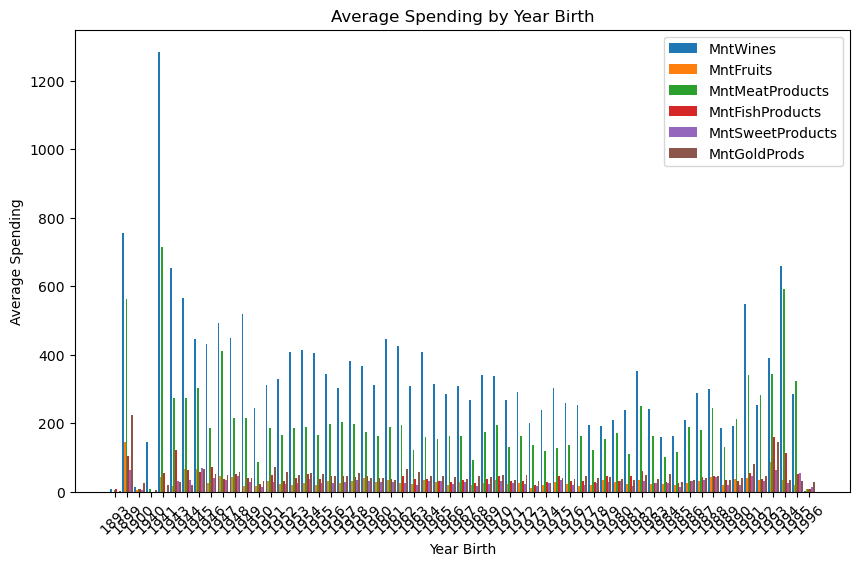

In [191]:
# Membuat figure dan axes
fig, ax = plt.subplots(figsize=(10, 6))

# Mengatur lebar bar
bar_width = 0.15
index = np.arange(len(avg_spending.index))

# Membuat bar chart untuk setiap kategori produk
bars1 = ax.bar(index, avg_spending['MntWines'], bar_width, label='MntWines')
bars2 = ax.bar(index + bar_width, avg_spending['MntFruits'], bar_width, label='MntFruits')
bars3 = ax.bar(index + 2 * bar_width, avg_spending['MntMeatProducts'], bar_width, label='MntMeatProducts')
bars4 = ax.bar(index + 3 * bar_width, avg_spending['MntFishProducts'], bar_width, label='MntFishProducts')
bars5 = ax.bar(index + 4 * bar_width, avg_spending['MntSweetProducts'], bar_width, label='MntSweetProducts')
bars6 = ax.bar(index + 5 * bar_width, avg_spending['MntGoldProds'], bar_width, label='MntGoldProds')

# Mengatur judul dan label sumbu
ax.set_title('Average Spending by Year Birth')
ax.set_xlabel('Year Birth')
ax.set_ylabel('Average Spending')
ax.set_xticks(index + 2.5 * bar_width)
ax.set_xticklabels(avg_spending.index)
ax.legend()

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

In [192]:
# Mengelompokkan data berdasarkan tingkat pendidikan
education_groups = df.groupby('Education')

# Menghitung rata-rata pengeluaran per kategori produk dan tingkat pendidikan
avg_spending = education_groups[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

print(avg_spending)

              MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Education                                                             
2n Cycle    200.845000  29.360000       135.080000        48.040000   
Basic         7.240741  11.111111        11.444444        17.055556   
Graduation  285.045699  30.861111       180.393369        43.416667   
Master      332.980822  21.375342       162.920548        31.493151   
PhD         407.222453  20.145530       169.738046        26.877339   

            MntSweetProducts  MntGoldProds  
Education                                   
2n Cycle           34.725000     46.880000  
Basic              12.111111     22.833333  
Graduation         31.285842     50.683692  
Master             20.808219     40.189041  
PhD                20.347193     32.403326  


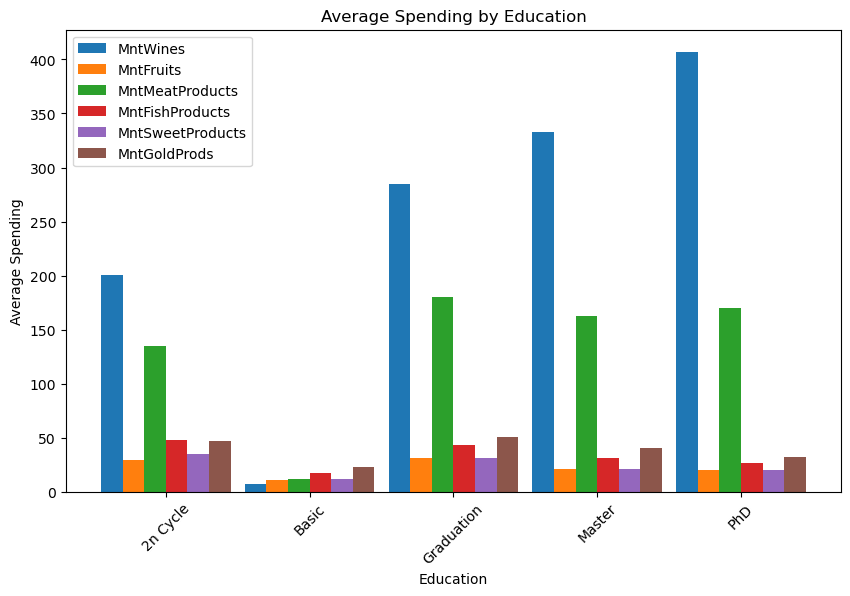

In [193]:
# Membuat figure dan axes
fig, ax = plt.subplots(figsize=(10, 6))

# Mengatur lebar bar
bar_width = 0.15
index = np.arange(len(avg_spending.index))

# Membuat bar chart untuk setiap kategori produk
bars1 = ax.bar(index, avg_spending['MntWines'], bar_width, label='MntWines')
bars2 = ax.bar(index + bar_width, avg_spending['MntFruits'], bar_width, label='MntFruits')
bars3 = ax.bar(index + 2 * bar_width, avg_spending['MntMeatProducts'], bar_width, label='MntMeatProducts')
bars4 = ax.bar(index + 3 * bar_width, avg_spending['MntFishProducts'], bar_width, label='MntFishProducts')
bars5 = ax.bar(index + 4 * bar_width, avg_spending['MntSweetProducts'], bar_width, label='MntSweetProducts')
bars6 = ax.bar(index + 5 * bar_width, avg_spending['MntGoldProds'], bar_width, label='MntGoldProds')

# Mengatur judul dan label sumbu
ax.set_title('Average Spending by Education')
ax.set_xlabel('Education')
ax.set_ylabel('Average Spending')
ax.set_xticks(index + 2.5 * bar_width)
ax.set_xticklabels(avg_spending.index)
ax.legend()

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

In [194]:
# Mengelompokkan data berdasarkan status pernikahan
marital_groups = df.groupby('Marital_Status')

# Menghitung rata-rata pengeluaran per kategori produk dan status pernikahan
avg_spending = marital_groups[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

print(avg_spending)

                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Marital_Status                                                            
Absurd          355.500000  84.500000       312.500000       205.500000   
Alone           184.666667   4.000000        26.333333         7.666667   
Divorced        324.844828  27.426724       150.206897        35.043103   
Married         299.855309  25.648775       160.896149        35.466744   
Single          291.331210  27.261146       184.849257        38.772824   
Together        308.403141  25.500873       166.446771        39.062827   
Widow           367.131579  31.868421       185.328947        49.907895   
YOLO            322.000000   3.000000        50.000000         4.000000   

                MntSweetProducts  MntGoldProds  
Marital_Status                                  
Absurd                 30.500000    204.000000  
Alone                   7.000000     27.000000  
Divorced               26.818966     46.288793  
Marr

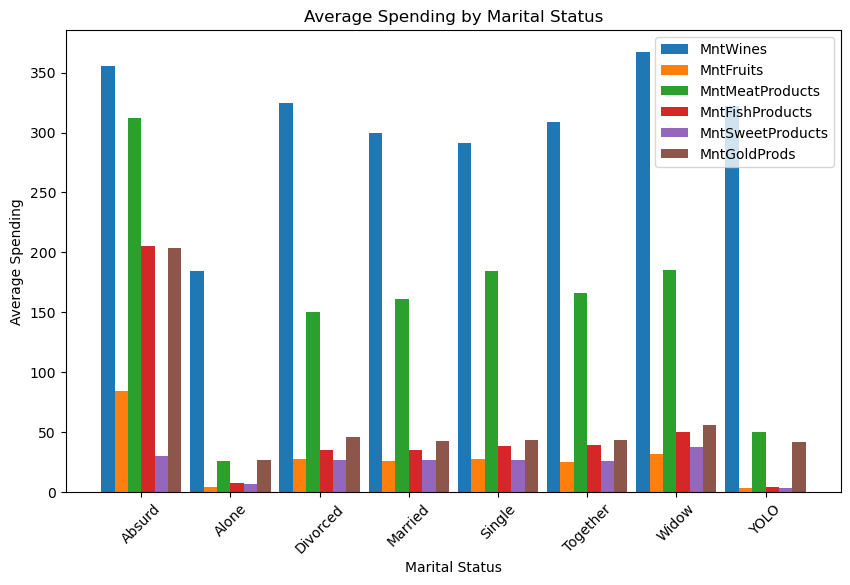

In [195]:
# Membuat figure dan axes
fig, ax = plt.subplots(figsize=(10, 6))

# Mengatur lebar bar
bar_width = 0.15
index = np.arange(len(avg_spending.index))

# Membuat bar chart untuk setiap kategori produk
bars1 = ax.bar(index, avg_spending['MntWines'], bar_width, label='MntWines')
bars2 = ax.bar(index + bar_width, avg_spending['MntFruits'], bar_width, label='MntFruits')
bars3 = ax.bar(index + 2 * bar_width, avg_spending['MntMeatProducts'], bar_width, label='MntMeatProducts')
bars4 = ax.bar(index + 3 * bar_width, avg_spending['MntFishProducts'], bar_width, label='MntFishProducts')
bars5 = ax.bar(index + 4 * bar_width, avg_spending['MntSweetProducts'], bar_width, label='MntSweetProducts')
bars6 = ax.bar(index + 5 * bar_width, avg_spending['MntGoldProds'], bar_width, label='MntGoldProds')

# Mengatur judul dan label sumbu
ax.set_title('Average Spending by Marital Status')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Average Spending')
ax.set_xticks(index + 2.5 * bar_width)
ax.set_xticklabels(avg_spending.index)
ax.legend()

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

In [196]:
# Mengelompokkan data berdasarkan status pernikahan
marital_groups = df.groupby('Income')

# Menghitung rata-rata pengeluaran per kategori produk dan status pernikahan
avg_spending = marital_groups[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

print(avg_spending)

          MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Income                                                            
1730.0         1.0        1.0              3.0              1.0   
2447.0         1.0        1.0           1725.0              1.0   
3502.0         2.0        1.0              1.0              0.0   
4023.0         5.0        0.0              1.0              1.0   
4428.0        16.0        4.0             12.0              2.0   
...            ...        ...              ...              ...   
157243.0      20.0        2.0           1582.0              1.0   
157733.0      39.0        1.0              9.0              2.0   
160803.0      55.0       16.0           1622.0             17.0   
162397.0      85.0        1.0             16.0              2.0   
666666.0       9.0       14.0             18.0              8.0   

          MntSweetProducts  MntGoldProds  
Income                                    
1730.0                 1.0           1.0  

In [197]:
# Group data by Kidhome and Teenhome
grouped_data = df.groupby(['Kidhome', 'Teenhome'])

# Calculate average spending for each product category for each group
avg_spending = grouped_data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Display the average spending by Kidhome and Teenhome
print(avg_spending)

                    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Kidhome Teenhome                                                            
0       0         488.072670  52.274882       370.865719        76.619273   
        1         417.716129  27.161290       139.285484        36.587097   
        2         409.566667  20.700000       133.466667        33.700000   
1       0          82.392354   9.873239        49.221328        14.605634   
        1         124.132791   6.501355        45.487805         9.363144   
        2         276.000000  12.857143       110.095238         8.571429   
2       0          61.235294  14.647059        42.058824        13.411765   
        1          78.310345   1.000000        23.068966         3.034483   

                  MntSweetProducts  MntGoldProds  
Kidhome Teenhome                                  
0       0                53.180095     64.235387  
        1                28.775806     55.912903  
        2                

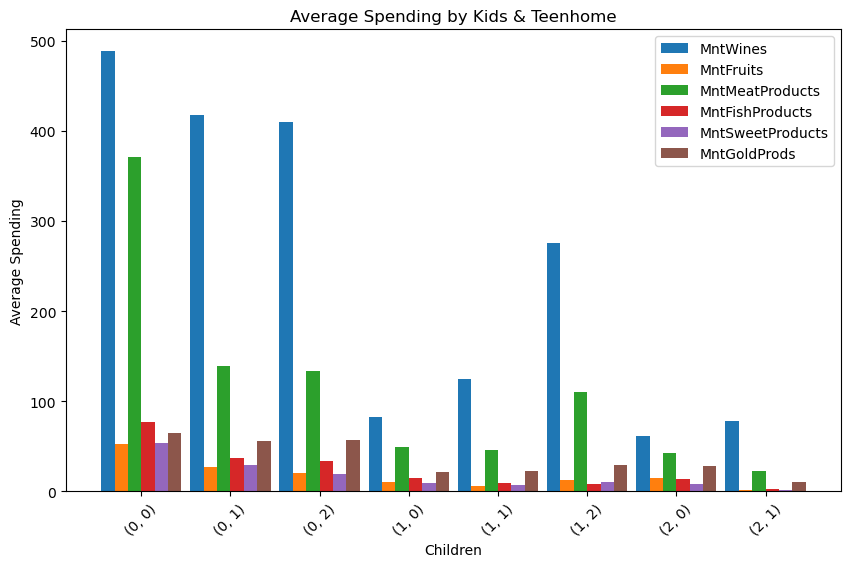

In [198]:
# Membuat figure dan axes
fig, ax = plt.subplots(figsize=(10, 6))

# Mengatur lebar bar
bar_width = 0.15
index = np.arange(len(avg_spending.index))

# Membuat bar chart untuk setiap kategori produk
bars1 = ax.bar(index, avg_spending['MntWines'], bar_width, label='MntWines')
bars2 = ax.bar(index + bar_width, avg_spending['MntFruits'], bar_width, label='MntFruits')
bars3 = ax.bar(index + 2 * bar_width, avg_spending['MntMeatProducts'], bar_width, label='MntMeatProducts')
bars4 = ax.bar(index + 3 * bar_width, avg_spending['MntFishProducts'], bar_width, label='MntFishProducts')
bars5 = ax.bar(index + 4 * bar_width, avg_spending['MntSweetProducts'], bar_width, label='MntSweetProducts')
bars6 = ax.bar(index + 5 * bar_width, avg_spending['MntGoldProds'], bar_width, label='MntGoldProds')

# Mengatur judul dan label sumbu
ax.set_title('Average Spending by Kids & Teenhome')
ax.set_xlabel('Children')
ax.set_ylabel('Average Spending')
ax.set_xticks(index + 2.5 * bar_width)
ax.set_xticklabels(avg_spending.index)
ax.legend()

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

In [199]:
print(data.columns)

Index(['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'], dtype='object')


In [207]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Membaca data
df = pd.read_csv('Supermarket Customers.csv', sep='\t')

# Mengidentifikasi variabel demografi
demographic_vars = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome']

# Mengidentifikasi variabel dependen
target_vars = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# One-hot encoding untuk variabel kategorik
categorical_cols = ['Education', 'Marital_Status']
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]).toarray())
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_cols], axis=1)

# Memisahkan variabel independen dan dependen
X = df[demographic_vars + list(encoded_cols.columns)]
y_dict = {var: df[var] for var in target_vars}

# Membangun model regresi linear untuk setiap kategori produk
models = {}
for target in target_vars:
    model = LinearRegression()
    model.fit(X, y_dict[target])
    models[target] = model

# Mencetak koefisien regresi untuk setiap kategori produk
for target, model in models.items():
    print(f'Koefisien untuk {target}:')
    coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
    print(coefs)
    print('\n')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

### **Menyimpan DataFrame df Ke Dalam File CSV (Comma Separated Values) Dengan Nama 'cleaned_data.csv'.**

1. df.to_csv() adalah metode dalam Pandas yang digunakan untuk menyimpan DataFrame ke dalam format file CSV.
2. 'cleaned_data.csv' adalah argumen pertama yang menentukan nama file CSV yang akan dibuat atau ditimpa jika file tersebut sudah ada.
3. index=False adalah parameter opsional yang menginstruksikan agar indeks baris (row index) dalam DataFrame tidak ditulis ke dalam file CSV.
4. sep=',' adalah parameter opsional yang menentukan karakter pemisah (separator) yang digunakan untuk memisahkan nilai-nilai dalam file CSV. Dalam kasus ini, karakter koma (,) digunakan sebagai pemisah.
5. header=True adalah parameter opsional yang menginstruksikan agar nama-nama kolom (header) dalam DataFrame ditulis ke baris pertama file CSV.

In [ ]:
df.to_csv('cleaned_data.csv', index=False, sep=',', header=True)